In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
model_df = pd.read_csv("~/watanabe/Divagar/CCLE_data/Model.csv")
tpm_df = pd.read_csv("~/watanabe/Divagar/CCLE_data/OmicsExpressionProteinCodingGenesTPMLogp1BatchCorrected.csv")


In [3]:
tpm_df.columns = tpm_df.columns.str.replace(r'\s\(\d+\)', '', regex=True)


In [4]:
tpm_df.rename(columns=
    {'Unnamed: 0': 'ModelID'
}, inplace=True)

In [5]:
merged_df = pd.merge(model_df,tpm_df, on='ModelID')

In [6]:
# only take cancer types with more than 20 cell lines in DepMap
group_sizes = merged_df.groupby('OncotreeSubtype').size()
valid_groups = group_sizes[group_sizes > 20].index

In [11]:
myc_summary_stats = merged_df[merged_df['OncotreeSubtype'].isin(valid_groups)].groupby('OncotreeSubtype')['MYC'].describe()

In [7]:
filtered_df = merged_df[merged_df['OncotreeSubtype'].isin(valid_groups)]


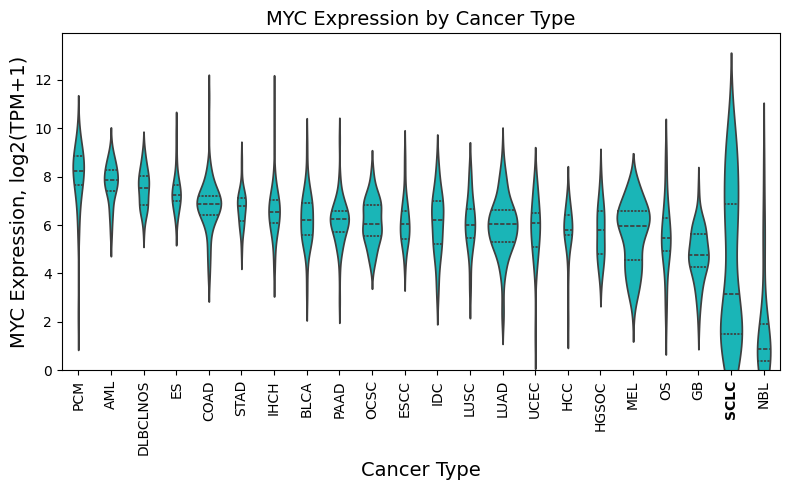

In [8]:
# order the cancer types by the highest mean expr of MYC family
mean_mycexpr = filtered_df.groupby('OncotreeCode')['MYC'].mean()
ordered_subtypes = mean_mycexpr.sort_values(ascending=False).index

plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_df, x='OncotreeCode', y='MYC', order=ordered_subtypes, inner="quart", width=1, density_norm="count", color="darkturquoise")

xticks = plt.gca().get_xticklabels()
for i, label in enumerate(xticks):
    if label.get_text() == 'SCLC':
        label.set_fontweight('bold')

plt.title('MYC Expression by Cancer Type', fontsize=14)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('MYC Expression, log2(TPM+1)', fontsize=14)

plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=10)
plt.ylim(bottom=0)
plt.tight_layout()
#plt.savefig('./plots/myc_expression_pan_cancer.png', dpi=600, bbox_inches='tight')

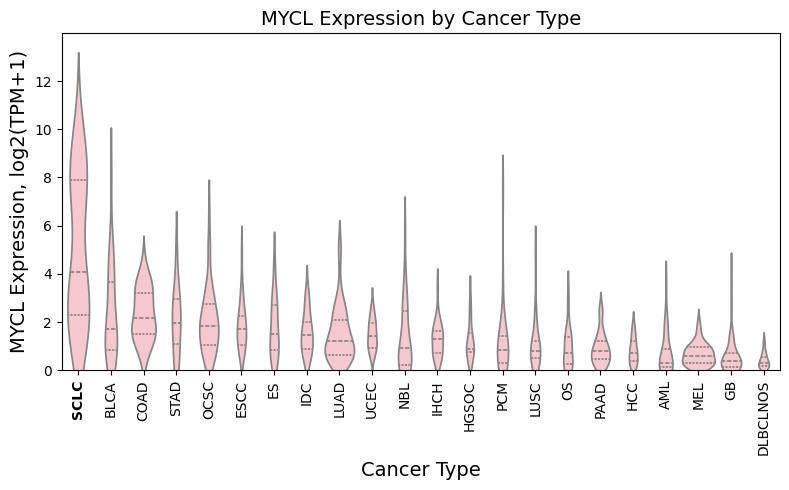

In [9]:
mean_myclexpr = filtered_df.groupby('OncotreeCode')['MYCL'].mean()
ordered_subtypes = mean_myclexpr.sort_values(ascending=False).index

plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_df, x='OncotreeCode', y='MYCL', order=ordered_subtypes, width = 1, inner="quart", density_norm="count", color="pink")

xticks = plt.gca().get_xticklabels()
for i, label in enumerate(xticks):
    if label.get_text() == 'SCLC':
        label.set_fontweight('bold')

plt.title('MYCL Expression by Cancer Type', fontsize=14)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('MYCL Expression, log2(TPM+1)', fontsize=14)

plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=10)
plt.ylim(bottom=0)
plt.tight_layout()
#plt.savefig('./plots/mycl_expression_pan_cancer2.png', dpi=600, bbox_inches='tight')

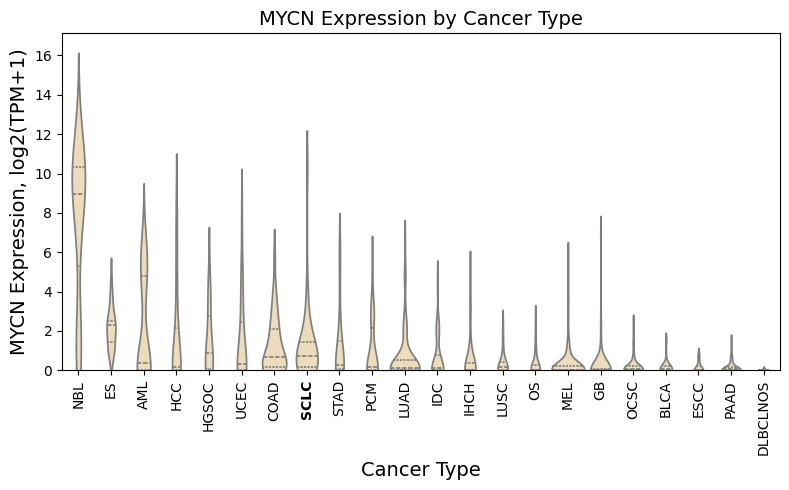

In [53]:
mean_mycnexpr = filtered_df.groupby('OncotreeCode')['MYCN'].mean()
ordered_subtypes = mean_mycnexpr.sort_values(ascending=False).index

plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_df, x='OncotreeCode', y='MYCN', order=ordered_subtypes, width=1, inner="quart", density_norm='count', color="wheat")

xticks = plt.gca().get_xticklabels()
for i, label in enumerate(xticks):
    if label.get_text() == 'SCLC':
        label.set_fontweight('bold')

plt.title('MYCN Expression by Cancer Type', fontsize=14)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('MYCN Expression, log2(TPM+1)', fontsize=14)

plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=10)
plt.ylim(bottom=0)
plt.tight_layout()
#plt.savefig('./plots/mycn_expression_pan_cancer1.png', dpi=600, bbox_inches='tight')